#Group 2.2
Names:

HUSSEINI Zyad mohamed mahmoud reda

SALAMANCA MELO Juan sebastian

DOSA Comfort pedetin

VINITHADAS Sonia

SYURGAWI Muhammad ridha

#TASK 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint, uniform

# Scikit-learn preprocessing and pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

# Model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

# LOAD DATASET

In [ ]:
from google.colab import files
uploaded = files.upload()
# After uploading, use the filename
df = pd.read_csv('mixed_playlist.csv')


Saving mixed_playlist.csv to mixed_playlist.csv


# DATA EXPLORATION

In [ ]:
# Eliminate records with missing values, check first:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3591 non-null   object 
 1   album             3591 non-null   object 
 2   artist            3600 non-null   object 
 3   release_date      3600 non-null   object 
 4   length            3600 non-null   int64  
 5   popularity        3600 non-null   int64  
 6   acousticness      3600 non-null   float64
 7   danceability      3600 non-null   float64
 8   energy            3600 non-null   float64
 9   instrumentalness  3600 non-null   float64
 10  liveness          3600 non-null   float64
 11  loudness          3600 non-null   float64
 12  speechiness       3600 non-null   float64
 13  tempo             3600 non-null   float64
 14  valence           3600 non-null   float64
 15  time_signature    3600 non-null   int64  
 16  key               3600 non-null   int64  


The results show that all 2 variables have 9 non-null values. Because its only 9 compare t0 3.600 instance we can delete.

In [ ]:
# Delete missing value by row:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3591 entries, 0 to 3599
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3591 non-null   object 
 1   album             3591 non-null   object 
 2   artist            3591 non-null   object 
 3   release_date      3591 non-null   object 
 4   length            3591 non-null   int64  
 5   popularity        3591 non-null   int64  
 6   acousticness      3591 non-null   float64
 7   danceability      3591 non-null   float64
 8   energy            3591 non-null   float64
 9   instrumentalness  3591 non-null   float64
 10  liveness          3591 non-null   float64
 11  loudness          3591 non-null   float64
 12  speechiness       3591 non-null   float64
 13  tempo             3591 non-null   float64
 14  valence           3591 non-null   float64
 15  time_signature    3591 non-null   int64  
 16  key               3591 non-null   int64  
 17  

In [ ]:
# Eliminate duplicate values, check first:
# delete duplicate one:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

In [ ]:
# Eliminate highly correlated features, check statistic first:
df.describe()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year
count,3.589000e+03,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000
mean,2.415145e+05,32.266927,0.451152,0.559325,0.504137,0.275765,0.164206,-10.706002,0.085083,115.087759,0.390294,3.866815,5.301755,0.463639,2012.371970
std,1.032022e+05,25.452462,0.358283,0.194056,0.259978,0.379946,0.141648,6.308046,0.093545,28.819588,0.256743,0.473471,3.507445,0.498746,10.680503
min,3.105300e+04,0.000000,0.000011,0.000000,0.000545,0.000000,0.017900,-42.117000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1957.000000
25%,1.870130e+05,0.000000,0.087000,0.429000,0.300000,0.000002,0.094000,-13.118000,0.036500,93.837000,0.163000,4.000000,2.000000,0.000000,2011.000000
50%,2.220000e+05,35.000000,0.405000,0.583000,0.528000,0.002970,0.111000,-8.871000,0.046500,114.969000,0.363000,4.000000,5.000000,0.000000,2016.000000
75%,2.700130e+05,52.000000,0.817000,0.707000,0.717000,0.712000,0.168000,-6.374000,0.086400,131.090000,0.583000,4.000000,8.000000,1.000000,2018.000000
max,1.921683e+06,91.000000,0.996000,0.971000,0.991000,0.995000,0.991000,-0.908000,0.952000,209.596000,0.981000,5.000000,11.000000,1.000000,2022.000000


Spotify dataset has a critical scaling problem with 5 features (length, popularity, loudness, tempo, release_year) that have vastly different ranges—for example, length ranges from ~31,000 to 1.9 million while most audio features are naturally scaled between 0-1, creating a million-fold magnitude difference that will cause distance-based models (KNN, SVM, Neural Networks) to completely ignore the smaller features.

Fortunately, 7 audio features (acousticness, danceability, energy, instrumentalness, liveness, speechiness, valence) are already normalized to 0-1 and need no scaling, while key, mode, and time_signature are categorical variables requiring one-hot encoding rather than scaling.

**Recommendation**: Apply StandardScaler to the 5 large-scale features before using any distance-based or gradient-based algorithms (though tree-based models like Random Forest work fine without scaling), which will prevent length and tempo from drowning out the subtle but important patterns in features like acousticness and danceability.

In [ ]:
# Display Correlation each features:
corr = df.corr(numeric_only = True)
corr.style.background_gradient(cmap = 'coolwarm')

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year
length,1.000000,-0.092433,0.029729,-0.118614,-0.049876,0.152160,-0.006439,-0.084903,-0.021448,-0.021266,-0.187629,-0.019257,-0.029883,0.031018,-0.142000
popularity,-0.092433,1.000000,-0.038560,0.052984,0.059058,-0.138480,-0.055137,0.101578,0.040597,0.031979,0.033033,-0.017101,0.003159,-0.008391,0.026993
acousticness,0.029729,-0.038560,1.000000,-0.437912,-0.785689,0.247263,-0.110371,-0.676936,-0.179739,-0.162082,-0.318251,-0.233319,-0.044371,-0.005320,-0.169473
danceability,-0.118614,0.052984,-0.437912,1.000000,0.482811,-0.374740,0.016792,0.529326,0.253881,0.103112,0.584346,0.255281,0.030190,-0.019305,0.140071
energy,-0.049876,0.059058,-0.785689,0.482811,1.000000,-0.308395,0.151755,0.827608,0.251895,0.181706,0.477640,0.240301,0.055963,-0.032843,0.180575
instrumentalness,0.152160,-0.138480,0.247263,-0.374740,-0.308395,1.000000,-0.098724,-0.480970,-0.255605,-0.056113,-0.411796,-0.133628,-0.001501,0.001086,-0.010137
liveness,-0.006439,-0.055137,-0.110371,0.016792,0.151755,-0.098724,1.000000,0.088564,0.102121,0.028498,0.119883,-0.013596,0.009260,0.014699,-0.038326
loudness,-0.084903,0.101578,-0.676936,0.529326,0.827608,-0.480970,0.088564,1.000000,0.201999,0.163356,0.464178,0.241459,0.039075,-0.013218,0.218076
speechiness,-0.021448,0.040597,-0.179739,0.253881,0.251895,-0.255605,0.102121,0.201999,1.000000,0.030545,0.249782,0.068909,0.014496,-0.034020,0.101479
tempo,-0.021266,0.031979,-0.162082,0.103112,0.181706,-0.056113,0.028498,0.163356,0.030545,1.000000,0.096713,0.010736,0.009866,-0.057287,0.025196


Remove **loudness** because it's 83% correlated with **energy** (redundant information), and energy is a better choice since it's already normalized to 0-1, more interpretable as a perceptual measure of intensity, and captures broader musical characteristics beyond just volume in decibels.

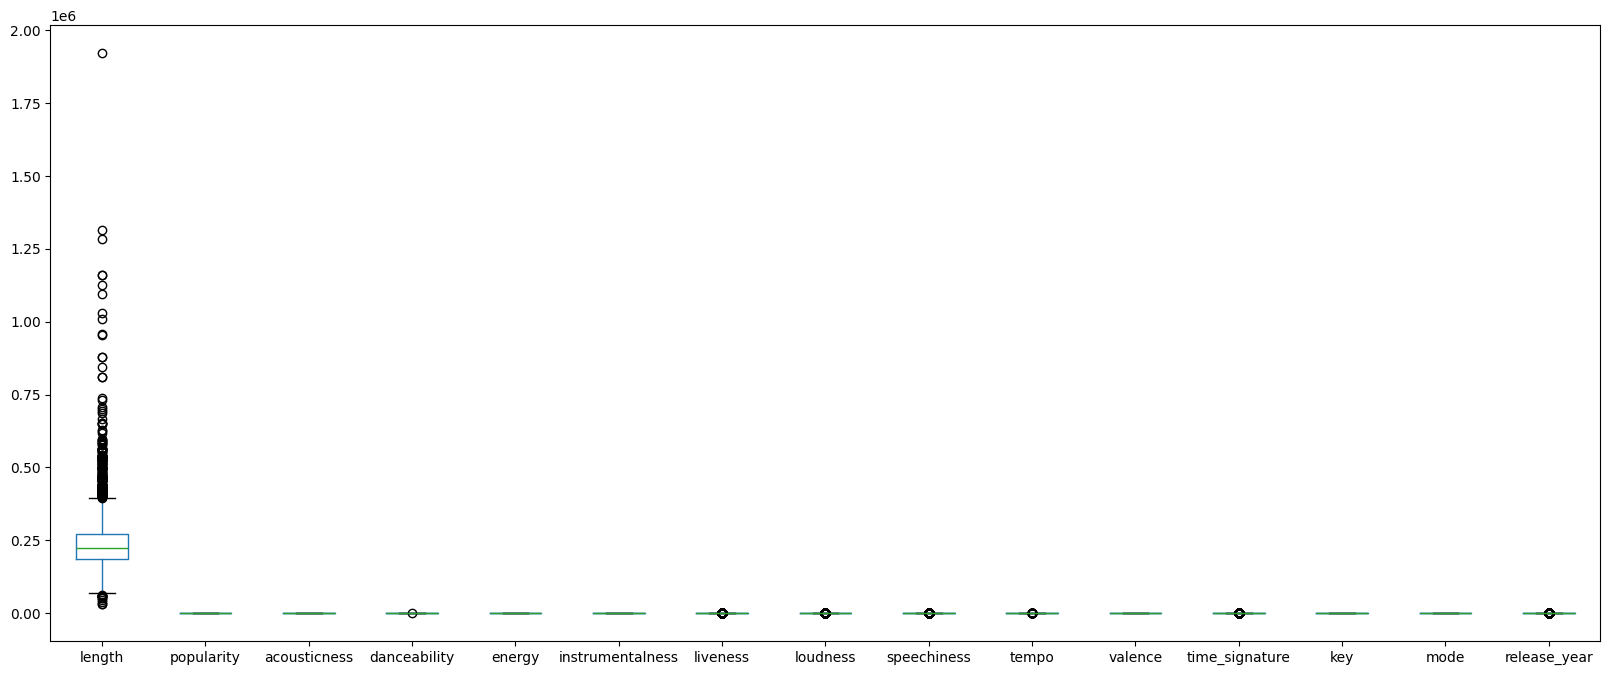

In [ ]:
# Check potential outliers:
df.boxplot(
    grid = False,
    figsize = (20, 8),
        )
plt.show()

Remove extreme outliers in the **length** feature

# DATA PREPROCESSING

In [ ]:
# Remove features highly positive correlation:
df.drop(columns = ['loudness'], inplace = True)
df.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
0,"Variations on a Polish Theme, Op. 10: No. 5 An...","Szymanowski: Piano Works, Vol. 2",Karol Szymanowski,06/12/1996,76933,53,0.9960,0.329,0.00695,0.866000,...,0.0448,70.295,0.238,4,11,0,spotify:track:3bcdLMrAxrfn5dxInjIdI2,1996,deleted by hacker,deleted by hacker
1,Je vous trouve un charme fou - En duo avec Gaë...,Il suffit d'y croire (Version deluxe),Hoshi,2018-11-30,172626,62,0.6220,0.615,0.59900,0.000008,...,0.2530,86.976,0.626,4,1,1,spotify:track:0C2yaSWVgCUiiqPyYxSOkd,2018,2025,delta
2,Me Gusta,On ira où ?,DTF,2019-10-11,175269,72,0.4130,0.834,0.73400,0.000040,...,0.3410,89.989,0.356,4,6,0,spotify:track:6P3FBaZfUjeWYExU2ShaPZ,2019,2023,gamma
3,L’amour en Solitaire,Petite Amie (Deluxe),Juliette Armanet,2018-02-02,175266,0,0.4040,0.797,0.50600,0.000153,...,0.0327,128.027,0.539,4,5,0,spotify:track:2tn51grfchxArwPXeXkoX5,2018,2021,gamma
4,Goodnight Moon,Volta,Boogie Belgique,2016-09-23,264735,53,0.0616,0.788,0.67500,0.711000,...,0.0318,107.993,0.525,4,7,0,spotify:track:2rvo9Ddv18aRV0OJldhWTf,2016,2023,alpha


In [ ]:
# delete extreme outlier
new_data_df = df.copy()
new_data_df = new_data_df[new_data_df['length'] < 600000].reset_index(drop=True)

# A. PREDICT USER = REGRESSION LOGISTIC

## Features Engineering

In [ ]:
def feature_engineering_user(df):
    """
    Apply feature engineering to the dataframe.Based on matrix user dan artis preferences.
    """
    # Preserve original index
    df['original_index'] = df.index

    # Create count matrix: rows=artists, columns=users, values=listen counts
    count_matrix = df.groupby(['artist', 'user']).size().unstack(fill_value=0)

    # Remove 'unknown' user column if exists
    count_matrix = count_matrix.drop(columns=['unknown'], errors='ignore')

    # Merge count matrix back to original dataframe
    df = df.merge(count_matrix, on='artist', how='left', suffixes=('', '_artist_count'))

    # Restore original index
    df.set_index('original_index', inplace=True)
    return df

    #Apply feature engineering:
print("Applying feature engineering...")
df = feature_engineering_user(df)
print(f"Dataset shape after feature engineering: {df.shape}\n")

Applying feature engineering...
Dataset shape after feature engineering: (3589, 27)



In [ ]:
#Separate user and cleaning some features:
valid_users = ['alpha', 'beta', 'gamma', 'delta', 'epsilon']
user_known = df[df['user'].isin(valid_users)]
user_unknown = df[df['user'] == 'deleted by hacker']

def clean_features(df):
    # Drop identifier columns (not useful for prediction):
    columns_to_drop = ['name', 'album', 'artist', 'uri']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Fix release_date: convert 'deleted by hacker' to numeric:
    if 'release_date' in df.columns:
        df['release_date'] = pd.to_numeric(df['release_date'], errors='coerce')
        # Fill missing values with median year
        df['release_date'] = df['release_date'].fillna(df['release_date'].median())

    # Encode any remaining categorical columns to numbers:
    categorical_cols = df.select_dtypes(include=['category', 'object']).columns
    for col in categorical_cols:
        df[col] = pd.Categorical(df[col]).codes

    return df

## Create target labels

In [ ]:
# Separate features (X) and target (y):
X_user = clean_features(user_known.drop(columns=['user'], errors='ignore'))
y_user = user_known['user']

# Encode user labels (convert user names to numbers):
label_encoder_user = LabelEncoder()
y_user_encoded = label_encoder_user.fit_transform(y_user)

## Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_user,
    y_user_encoded,
    train_size=0.7,
    random_state=1,
    stratify=y_user_encoded  # Keep same user distribution in train/test
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples\n")

Training set: 2442 samples
Test set: 1047 samples



## Train Logistic Regression

In [ ]:
#Pipeline:
user_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),  # Feature interactions (degree=1 means no interactions)
    ('scaler', StandardScaler()),            # Normalize features to same scale
    ('classifier', LogisticRegression(       # Multi-class classifier
        max_iter=1000,
        multi_class='multinomial',
        solver='lbfgs',
        random_state=1
    ))
])

#Train the model
user_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    random_state=1))])

## Evaluate with various metrics

In [ ]:
#Classification Report:
print("TRAINING DATA PERFORMANCE")
y_train_pred = user_pipeline.predict(X_train)
print(classification_report(y_train, y_train_pred))
print("TEST DATA PERFORMANCE")
y_test_pred = user_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred))

TRAINING DATA PERFORMANCE
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       490
           1       0.86      0.89      0.88       490
           2       0.87      0.86      0.87       487
           3       0.94      0.93      0.93       486
           4       0.90      0.92      0.91       489

    accuracy                           0.88      2442
   macro avg       0.88      0.88      0.88      2442
weighted avg       0.88      0.88      0.88      2442

TEST DATA PERFORMANCE
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       210
           1       0.82      0.83      0.83       210
           2       0.90      0.84      0.87       209
           3       0.88      0.93      0.90       209
           4       0.89      0.89      0.89       209

    accuracy                           0.85      1047
   macro avg       0.86      0.85      0.85      1047
weighted avg       0.86      

# B. PREDICT TOP YEAR = COMPARATION ML

# B.1 KNN

## Features Engineering

In [ ]:
def feature_engineering_user(df):
   # Preserve original index:
    df['original_index'] = df.index

    # Create count matrix: rows=album, columns=top_year, values=listen counts:
    count_matrix = df.groupby(['album', 'top_year']).size().unstack(fill_value=0)

    # Remove 'unknown' user column if exists:
    count_matrix = count_matrix.drop(columns=['unknown'], errors='ignore')

    # Merge count matrix back to original dataframe:
    df = df.merge(count_matrix, on='album', how='left', suffixes=('', '_album_count'))

    # Restore original index:
    df.set_index('original_index', inplace=True)
    return df

    #Apply feature engineering:
    df = feature_engineering_user(df)


In [ ]:
#Separate user and cleaning some features:
valid_top_year = ['2019', '2020', '2021', '2022', '2023','2024','2025']
year_known = df[df['top_year'].isin(valid_top_year)]
year_unknown = df[df['top_year'] == 'deleted by hacker']

## Create target labels

In [ ]:
# Separate features (X) and target (y):
X_year = clean_features(year_known.drop(columns=['user', 'top_year']))
y_year = year_known['top_year']
label_encoder_year = LabelEncoder()
y_year_encoded = label_encoder_year.fit_transform(y_year)

## Train-test split

In [ ]:
X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(
    X_year, y_year_encoded, test_size=0.3, random_state=1
)

print(f"Training set: {X_train_year.shape[0]} samples")
print(f"Test set: {X_test_year.shape[0]} samples\n")

Training set: 2442 samples
Test set: 1047 samples



## Construct Pipeline KNN

In [ ]:
# construct the pipeline :
pipeline = Pipeline([
    ('standard scaler', StandardScaler()),
    ('k-nearest neighbors', KNeighborsClassifier())
])

# Define parameter grid for tuning:
param_grid = {
    'k-nearest neighbors__n_neighbors': [7],  # Try different values of k
    'k-nearest neighbors__weights': ['uniform', 'distance'],
    'k-nearest neighbors__metric': ['euclidean', 'manhattan']
}

# Grid search with cross-validation:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

## Evaluate

In [ ]:
# Prediction on Top Year train set:
grid_search_year = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search_year.fit(X_train_year, y_train_year)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standard scaler', StandardScaler()),
                                       ('k-nearest neighbors',
                                        KNeighborsClassifier())]),
             param_grid={'k-nearest neighbors__metric': ['euclidean',
                                                         'manhattan'],
                         'k-nearest neighbors__n_neighbors': [7],
                         'k-nearest neighbors__weights': ['uniform',
                                                          'distance']},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search_year.best_params_)

Best Parameters: {'k-nearest neighbors__metric': 'manhattan', 'k-nearest neighbors__n_neighbors': 7, 'k-nearest neighbors__weights': 'uniform'}


In [ ]:
y_train_pred_year = grid_search_year.predict(X_train_year)

print("Training Data Classification Report:")
print(classification_report(y_train_year, y_train_pred_year))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       337
           1       0.79      0.80      0.79       348
           2       0.78      0.78      0.78       347
           3       0.75      0.81      0.78       343
           4       0.73      0.66      0.70       370
           5       0.71      0.69      0.70       348
           6       0.83      0.75      0.79       349

    accuracy                           0.77      2442
   macro avg       0.77      0.77      0.76      2442
weighted avg       0.77      0.77      0.76      2442



In [ ]:
# Prediction on Top Year test data:
y_test_pred_year = grid_search_year.predict(X_test_year)

print("Test Data Classification Report:")
print(classification_report(y_test_year, y_test_pred_year))

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       163
           1       0.72      0.75      0.73       150
           2       0.68      0.70      0.69       148
           3       0.63      0.71      0.67       153
           4       0.51      0.52      0.52       130
           5       0.59      0.46      0.52       152
           6       0.72      0.64      0.68       151

    accuracy                           0.66      1047
   macro avg       0.66      0.66      0.65      1047
weighted avg       0.66      0.66      0.66      1047



# B.2 SVM

## Construct Pipeline SVM

In [ ]:
# construct the pipeline:
clf = Pipeline(
    [
        ('standard scaler', StandardScaler()),
        ('support vector machine', SVC(
            kernel = 'linear' # linear kernel function
        ))
    ]
)


# fit the model:
clf.fit(X_train_year, y_train_year)

Pipeline(steps=[('standard scaler', StandardScaler()),
                ('support vector machine', SVC(kernel='linear'))])

## Evaluate

In [ ]:
# Prediction on Top Year train set:
y_train_year_pred = clf.predict(X_train_year)

print("Training Data Classification Report:")
print(classification_report(y_train_year, y_train_year_pred))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       337
           1       0.85      0.83      0.84       348
           2       0.81      0.80      0.81       347
           3       0.86      0.85      0.86       343
           4       0.77      0.85      0.81       370
           5       0.87      0.66      0.75       348
           6       0.81      0.89      0.85       349

    accuracy                           0.82      2442
   macro avg       0.83      0.82      0.82      2442
weighted avg       0.83      0.82      0.82      2442



In [ ]:
# Prediction on test set:
y_test_pred_year = clf.predict(X_test_year)

print("Test Data Classification Report:")
print(classification_report(y_test_year, y_test_pred_year))

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       163
           1       0.77      0.76      0.77       150
           2       0.74      0.76      0.75       148
           3       0.82      0.82      0.82       153
           4       0.66      0.79      0.72       130
           5       0.82      0.55      0.66       152
           6       0.80      0.83      0.82       151

    accuracy                           0.77      1047
   macro avg       0.77      0.77      0.76      1047
weighted avg       0.77      0.77      0.77      1047



# B.3 Decision Tree

## Construct Pipeline DECISION TREE

In [ ]:
# Define parameter distributions for Decision Tree:
param_distributions = dict(
    criterion=['gini', 'entropy',],
    max_depth=randint(low=10, high=50),
    min_samples_split=randint(low=2, high=30),
    min_samples_leaf=randint(low=1, high=30),
    max_features=['sqrt', 'log2', None],
    min_impurity_decrease=uniform(loc=0.0, scale=0.01)
)

# Create Decision Tree classifier:
dt_clf = DecisionTreeClassifier(random_state=1)

# Setup RandomizedSearchCV:
random_search = RandomizedSearchCV(
    estimator=dt_clf,
    param_distributions=param_distributions,
    n_iter=100,  # Number of random combinations to try
    cv=10,  # 5-fold cross-validation
    refit = True,
    scoring='accuracy',
    random_state=0,
    verbose=10
)

# Fit the random search:
print("Starting RandomizedSearchCV for Decision Tree...")
random_search.fit(X_train_year, y_train_year)

# Get best parameters:
print("BEST PARAMETERS")
print(random_search.best_params_)
print("BEST CROSS-VALIDATION SCORE")
print(f"Best CV Score: {random_search.best_score_:.4f}")

# Use best model for predictions:
best_clf = random_search.best_estimator_

# Prediction on training set:
y_train_pred = best_clf.predict(X_train_year)
print(classification_report(y_train_year, y_train_pred_year))

# Prediction on test set:
y_test_pred_year = best_clf.predict(X_test_year)
print(classification_report(y_test_year, y_test_pred_year))

# Show feature importances (optional)
feature_importance = pd.DataFrame({
    'feature': X_train_year.columns,
    'importance': best_clf.feature_importances_
}).sort_values('importance', ascending=False)


Starting RandomizedSearchCV for Decision Tree...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START criterion=gini, max_depth=10, max_features=log2, min_impurity_decrease=0.006235636967859724, min_samples_leaf=19, min_samples_split=6
[CV 1/10; 1/100] END criterion=gini, max_depth=10, max_features=log2, min_impurity_decrease=0.006235636967859724, min_samples_leaf=19, min_samples_split=6;, score=0.282 total time=   0.0s
[CV 2/10; 1/100] START criterion=gini, max_depth=10, max_features=log2, min_impurity_decrease=0.006235636967859724, min_samples_leaf=19, min_samples_split=6
[CV 2/10; 1/100] END criterion=gini, max_depth=10, max_features=log2, min_impurity_decrease=0.006235636967859724, min_samples_leaf=19, min_samples_split=6;, score=0.269 total time=   0.0s
[CV 3/10; 1/100] START criterion=gini, max_depth=10, max_features=log2, min_impurity_decrease=0.006235636967859724, min_samples_leaf=19, min_samples_split=6
[CV 3/10; 1/100] END criterion=gini, ma

# B.4 Comparation Model ML

In [ ]:
# Models
models = [
    ('KNN', grid_search_year),
    ('SVM', clf),
    ('Decision Tree', best_clf)
]

# Collect metrics:
summary_data = []
for name, model in models:
    # Train metrics:
    y_train_pred = model.predict(X_train_year)
    train_report = classification_report(y_train_year, y_train_pred, output_dict=True)

    # Test metrics:
    y_test_pred = model.predict(X_test_year)
    test_report = classification_report(y_test_year, y_test_pred, output_dict=True)

    summary_data.append({
        'Model': name,
        'Train Accuracy': train_report['accuracy'],
        'Test Accuracy': test_report['accuracy'],
        'Train F1 (Weighted)': train_report['weighted avg']['f1-score'],
        'Test F1 (Weighted)': test_report['weighted avg']['f1-score'],
        'Overfitting Gap': train_report['accuracy'] - test_report['accuracy']
    })

summary_df = pd.DataFrame(summary_data)

# Display table:
print("="*100)
print("SUMMARY COMPARISON TABLE")
print("="*100)
print(summary_df.round(4).to_string(index=False))

# Best model:
best_idx = summary_df['Test F1 (Weighted)'].idxmax()
best_model = summary_df.iloc[best_idx]



SUMMARY COMPARISON TABLE
        Model  Train Accuracy  Test Accuracy  Train F1 (Weighted)  Test F1 (Weighted)  Overfitting Gap
          KNN          0.7654         0.6609               0.7640              0.6576           0.1044
          SVM          0.8247         0.7679               0.8232              0.7655           0.0568
Decision Tree          0.7891         0.7727               0.7875              0.7706           0.0164


**Justification** : We selected the **Decision Tree** because it delivers the best overall performance on the test set, with the highest weighted **F1-score (0.7706**), which means it balances precision and recall well across all classes. Its **test accuracy (0.7727)** is strong and closely aligned with the **training accuracy (0.7891)**, indicating the model is learning meaningful patterns without memorizing the data. The overfitting gap is **very small (0.0164)**, so the model generalizes reliably to unseen examples. In short, it provides the most dependable results for real-world predictions while maintaining stable performance between training and testing.

# C. PREDICTION BY CHOOSEN BEST ML MODEL

## C.1 Predict User

In [ ]:
user_unknown = df[df['user'] == 'deleted by hacker'].copy()
print(f"\nUser unknown entries: {len(user_unknown)}")

if len(user_unknown) > 0:
    X_unknown_user = user_unknown.drop(columns=['user'])
    X_unknown_user = clean_features(X_unknown_user)


    year_cols = ['2019', '2020', '2021', '2022', '2023', '2024', '2025']
    X_unknown_user = X_unknown_user.drop(columns=year_cols, errors='ignore')

    training_cols = X_user.columns.tolist()

    for col in training_cols:
        if col not in X_unknown_user.columns:
            X_unknown_user[col] = 0

    X_unknown_user = X_unknown_user[training_cols]

    user_unknown['user'] = label_encoder_user.inverse_transform(user_pipeline.predict(X_unknown_user))
    print("✓ Users predicted")

    # Show distribution
    for user in sorted(user_unknown['user'].unique()):
        count = (user_unknown['user'] == user).sum()
        print(f"  - {user}: {count} songs")



User unknown entries: 100
✓ Users predicted
  - alpha: 1 songs
  - beta: 99 songs


## C.2 Predict Year

In [ ]:
year_unknown = df[df['top_year'] == 'deleted by hacker'].copy()
print(f"\nYear unknown entries: {len(year_unknown)}")

if len(year_unknown) > 0:
    # Match training: drop 'user' and 'top_year' columns:
    X_unknown_year = year_unknown.drop(columns=['user', 'top_year'])
    X_unknown_year = clean_features(X_unknown_year)

    # Make sure we have the same columns as training:
    training_cols_year = X_year.columns.tolist()

    # Add missing columns with 0:
    for col in training_cols_year:
        if col not in X_unknown_year.columns:
            X_unknown_year[col] = 0

    # Keep only training columns in same order:
    X_unknown_year = X_unknown_year[training_cols_year]

    year_unknown['top_year'] = label_encoder_year.inverse_transform(best_clf.predict(X_unknown_year))
    print("✓ Years predicted")

    # Show distribution:
    from collections import Counter
    year_counts = Counter(year_unknown['top_year'])
    for year in sorted(year_counts.keys()):
        print(f"  - {year}: {year_counts[year]} songs")


Year unknown entries: 100
✓ Years predicted
  - 2019: 1 songs
  - 2021: 2 songs
  - 2022: 1 songs
  - 2025: 96 songs


## C.3 Update original dataframe with predictions

In [ ]:
# Select original columns:
original_columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity',
                    'acousticness', 'danceability', 'energy', 'instrumentalness',
                    'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
                    'time_signature', 'key', 'mode', 'uri', 'year',
                    'top_year', 'user']

# Keep only existing columns:
original_columns = [col for col in original_columns if col in df.columns]
df_final = df[original_columns].copy()

# Update with predictions:
if len(year_unknown) > 0:
    for idx in year_unknown.index:
        df_final.loc[idx, 'top_year'] = year_unknown.loc[idx, 'top_year']

if len(user_unknown) > 0:
    for idx in user_unknown.index:
        df_final.loc[idx, 'user'] = user_unknown.loc[idx, 'user']

print("✓ Dataframe updated with predictions")

# Verify no more "deleted by hacker":
remaining_user_unknown = (df_final['user'] == 'deleted by hacker').sum()
remaining_year_unknown = (df_final['top_year'] == 'deleted by hacker').sum()
print(f"  Remaining user unknowns: {remaining_user_unknown}")
print(f"  Remaining year unknowns: {remaining_year_unknown}")

✓ Dataframe updated with predictions
  Remaining user unknowns: 0
  Remaining year unknowns: 0


## C.4 Generate User and Year

In [ ]:
file_count = 0
summary = []

# Iterate through each unique user and year combination:
for user in sorted(df_final['user'].unique()):
    for year in sorted(df_final['top_year'].unique()):
        # Filter the data based on user and year
        subset_df = df_final[(df_final['user'] == user) & (df_final['top_year'] == year)]

        if not subset_df.empty:
            # Create the filename based on the user and year:
            filename = f"{user}_{year}.csv"

            # Write the filtered data to a CSV file:
            subset_df.to_csv(filename, index=False)
            file_count += 1
            summary.append({'user': user, 'year': year, 'songs': len(subset_df)})
            print(f"✓ {file_count:2d}. {filename}: {len(subset_df)} songs")

✓  1. alpha_2019.csv: 100 songs
✓  2. alpha_2020.csv: 100 songs
✓  3. alpha_2021.csv: 100 songs
✓  4. alpha_2022.csv: 100 songs
✓  5. alpha_2023.csv: 100 songs
✓  6. alpha_2024.csv: 100 songs
✓  7. alpha_2025.csv: 101 songs
✓  8. beta_2019.csv: 101 songs
✓  9. beta_2020.csv: 100 songs
✓ 10. beta_2021.csv: 102 songs
✓ 11. beta_2022.csv: 101 songs
✓ 12. beta_2023.csv: 100 songs
✓ 13. beta_2024.csv: 100 songs
✓ 14. beta_2025.csv: 195 songs
✓ 15. delta_2019.csv: 100 songs
✓ 16. delta_2020.csv: 100 songs
✓ 17. delta_2021.csv: 100 songs
✓ 18. delta_2022.csv: 96 songs
✓ 19. delta_2023.csv: 100 songs
✓ 20. delta_2024.csv: 100 songs
✓ 21. delta_2025.csv: 100 songs
✓ 22. epsilon_2019.csv: 100 songs
✓ 23. epsilon_2020.csv: 100 songs
✓ 24. epsilon_2021.csv: 95 songs
✓ 25. epsilon_2022.csv: 100 songs
✓ 26. epsilon_2023.csv: 100 songs
✓ 27. epsilon_2024.csv: 100 songs
✓ 28. epsilon_2025.csv: 100 songs
✓ 29. gamma_2019.csv: 100 songs
✓ 30. gamma_2020.csv: 98 songs
✓ 31. gamma_2021.csv: 100 songs
✓ 32

## C.5 Summary

In [ ]:
summary_df = pd.DataFrame(summary)

# Pivot table
pivot = summary_df.pivot(index='user', columns='year', values='songs').fillna(0).astype(int)
print("\nSongs per User per Year:")
print(pivot.to_string())

# Totals
print(f"\nTotal songs per user:")
user_totals = summary_df.groupby('user')['songs'].sum().sort_index()
print(user_totals.to_string())

print(f"\nTotal songs per year:")
year_totals = summary_df.groupby('year')['songs'].sum().sort_index()
print(year_totals.to_string())

print("\n" + "=" * 80)
print(f"✓ COMPLETE! Generated {file_count} CSV files")
print(f"✓ Total songs: {summary_df['songs'].sum()}")
print("=" * 80)


Songs per User per Year:
year     2019  2020  2021  2022  2023  2024  2025
user                                             
alpha     100   100   100   100   100   100   101
beta      101   100   102   101   100   100   195
delta     100   100   100    96   100   100   100
epsilon   100   100    95   100   100   100   100
gamma     100    98   100   100   100   100   100

Total songs per user:
user
alpha      701
beta       799
delta      696
epsilon    695
gamma      698

Total songs per year:
year
2019    501
2020    498
2021    497
2022    497
2023    500
2024    500
2025    596

✓ COMPLETE! Generated 35 CSV files
✓ Total songs: 3589


In [ ]:
#THANK YOU

# Task 2

## Problem Formulation



In this task we will create and design a song reccomendation system for spotify family accounts that recommends the next song or a ranked list of songs based on some characteristics these include:


*   User preferences
*   family context

This is formulated as a supervised binary classification and ranking problem. For each candidate song, the system predicts whether the song will lead to a positive listening outcome (e.g. not skipped early, possibly liked or saved). Songs are then ranked according to this predicted probability, and the top song(s) are recommended.

This formulation is suitable for family accounts, where listening may involve a single user or multiple family members and where content restrictions must be respected.




###Inputs of the model


For this model there will be 3 main groups and their features they include:


1.   Song Features (Describe the characteristics of each song)
2.   User Taste (Reflects Musical Preferences)
3. Family and context (Accounts for shared lsitening situations)




###Outputs of the model

the output of the system:

1.   A ranked list of songs ordered by various things: relevance, single or top ranked song which helps picking the next song playedd




## Modeling Approach

First, a set of candidate songs is selected using simple similarity ruless, wdhile filtering out songs that violate family rules such as explicit content restrictions.

Second, the candidate songs are ranked using a Logistic Regression model, which predicts the probability that each song will be a good next choice.

Logistic Regression is chosen because it is simple, interpretable, computationally efficient, and appropriate for an introductory machine-learning setting.

###Machine Learning Models Used

A Logistic Regresionn Model Is Used

It takes song features, user or household preference features, and context features as input, and outputs a probability that a candidate song will result in a positive listening outcome. Songs are ranked according to this probability.

###Evaluating The Model

We wOULD train the model using historical listneing data each training examples which include:


1.   Features of the current song
2.   Features of the candidate song
3. uSER Preferences
4. Context features

next: a binary label indicating whether the song was a positive outcome (played most of the time, liked) or a negative outcome (skipped early). Negative examples include skipped songs or randomly sampled non-played songs.

The model is then evaluated without affecting the real userbase without first making sure that the model is very accurate we would use:



1.   Accuracy, Precision, and Recall
2.   ROC-AUC
3. Hit Rate@K (presence of the true next song in the top K recommendations)
4. Skip rate during shared listening (family accounts)
5. Explicit content violations under restricted settings







##Features

###Feature 1

 Song audio features

Examples: energy, danceability, valence, tempo, loudness, acousticness

Why relevant: These features describe how a song sounds in terms of mood, rhythm, and intensity.

How they influence the recommendation: Songs with audio characteristics similar to the user’s preferences or current session are ranked higher, reducing the chance of skips.



###Feature 2

Song metadata

Examples: artist, genre, release year, popularity, explicit-content flag

Why relevant: Metadata captures musical style, familiarity, and safety constraints.

How they influence the recommendation: Preferred artists and genres increase recommendation likelihood, popular songs reduce skip risk, and explicit flags allow filtering for family safety.

### Feature 3

User long-term preference features (Songs listened to in the past year)

Examples: favorite genres, favorite artists, average audio-feature preferences

Why relevant: These features represent stable musical taste over time.

How they influence the recommendation: The model favors songs that match the user’s typical listening patterns.

### Feature 4

Short-term listening behavior features (songs listened to in the past 3 months)

Examples: recently played songs, recent skips or likes

Why relevant: User preferences can change within a listening session.

How they influence the recommendation: Recently liked songs increase the chance of similar recommendations, while skipped songs reduce it.

### Feature 5

Family and context features

Examples: listening mode (individual or shared), time of day, explicit-content settings

Why relevant: Family accounts may involve multiple listeners and shared environments.

How they influence the recommendation: Preferences are combined during shared listening, recommendations adapt to time of day, and unsafe content is excluded when necessary.